In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd drive/My\ Drive/minor

/content/drive/My Drive/minor


In [3]:
!ls

analysis.csv	    dtree_minor.png
csv_minmax_test     improved_min_max_scaled_compressed_datafile.h5
DecisionTree.ipynb  improved_std_scaled_compressed_datafile.h5
decision_tree.pkl   test.ipynb
dtree_minor.pdf


In [0]:
df = pd.read_hdf("improved_min_max_scaled_compressed_datafile.h5")

In [0]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(3016636, 137)

In [13]:
df.shape

(3016636, 137)

In [0]:
# x = df.iloc[:,:136]

In [0]:
# y = df.iloc[:,136:]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:136].values, df.iloc[:,136:].values, test_size=0.33, random_state=42)

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
regressor = DecisionTreeRegressor(random_state=0,min_samples_split = 10000)

In [20]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10000, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [21]:
regressor.score(X_test,y_test)

0.753056693222468

In [23]:
regressor.score(X_train,y_train)

0.7559180543346241

In [0]:
#TRY THIS CODE NEXT TIME
## Create DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=iris.feature_names,  
#                                 class_names=iris.target_names)

# # Draw graph
# graph = pydotplus.graph_from_dot_data(dot_data)  

# # Show graph
# Image(graph.create_png())

In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

In [25]:
graph.write_png("dtree_minor_10000.png")

True

In [26]:
graph.write_pdf("dtree_minor_10000.pdf")

True

In [0]:
import pickle

In [0]:
decision_tree_pkl_filename = 'decision_tree_10000.pkl'
# Open the file to save as pkl file
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')
pickle.dump(regressor, decision_tree_model_pkl)
# Close the pickle instances
decision_tree_model_pkl.close()

In [7]:
# Loading the saved decision tree model pickle
decision_tree_pkl_filename = 'decision_tree_10000.pkl'
decision_tree_model_pkl = open(decision_tree_pkl_filename, 'rb')
regressor = pickle.load(decision_tree_model_pkl)
print("Loaded Decision tree model :: ", regressor)

Loaded Decision tree model ::  DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [0]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
y_pred.shape

(995490,)

In [0]:
y_test = y_test.reshape(-1)

In [0]:
new_df = pd.DataFrame()

In [0]:
new_df['y_pred'] = y_pred
new_df['y_test'] = y_test

In [0]:
new_df.to_csv("predictions.csv",index=False)

In [0]:
y_test_plot = y_test.reshape(-1)

In [0]:
x_range = np.linspace(0, 995848, num=995848)

In [0]:
import matplotlib.pyplot as plt

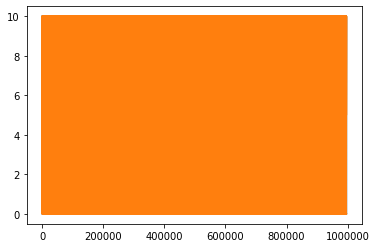

In [0]:
plt.plot(x_range,y_test_plot)
plt.plot(x_range,y_pred)
plt.show()

In [0]:
df_new  = pd.DataFrame(X_test)

In [0]:
df_new['y_test'] = y_test

In [0]:
df_new['y_pred'] = y_pred

In [0]:
df_new.to_csv("analysis.csv",index=False)

In [0]:
!ls

analysis.csv	    improved_min_max_scaled_compressed_datafile.h5
DecisionTree.ipynb  improved_std_scaled_compressed_datafile.h5
